| Übungszettel 11 | Einführung in die Numerik |
|---|---|
| Dozent      | Prof. Kanschat |
| Tutoren     | S. Meggendorfer und J. Witte |
| Abgabe      | bis 08.07.21 23.15 Uhr |
| Studierende | Daniel Schiller, Thomas Blankenburg, Dennis Jakob |

### Aufgabe: LR-Zerlegung

In dieser Aufgabe sollen Sie die LR-Zerlegung auf Hilbertmatrizen anwenden. Eine Hilbertmatrix $H$ ist definiert durch
$$
H = \begin{pmatrix} 1 & \frac{1}{2} & \frac{1}{3} & \cdots & \frac{1}{n} \\ \frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \cdots & \frac{1}{n+1} \\ \frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \cdots & \frac{1}{n+2} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ \frac{1}{n} & \frac{1}{n+1} & \frac{1}{n+2} & \cdots & \frac{1}{2n-1}
\end{pmatrix},
$$
und kann mithilfe der Funktion `scipy.linalg.hilbert(n)` berechnet werden.

a) Programmieren Sie eine Funktion `solve_lr(...)`, die mithilfe der LR-Zerlegung lineare Gleichungssysteme der Form $Ax=b$ löst. Nutzen Sie hierfür die Funktionen `scipy.linalg.lu_factor` und `scipy.linalg.lu_solve`.

b) Implementieren Sie eine von $n$ abhängende Funktion, die zu vorgegebenem $x^*=(1,\ldots,1)^T$ der Länge $n$ die rechte Seite $b=Hx^*$ berechnet, anschließend mit der oben programmierten Funktion `solve_lr(...)` das Gleichungssystem $Hx=b$ löst und schließlich den Fehler $\|x-x^*\|$, sowie das Residuum $\|Hx-b\|$ in der 1-norm, der euklidischen Norm, sowie der Maximumsnorm zurück gibt. Für die Matrix-Vektor-Multiplikation können Sie `@` nutzen.

c) Berechnen Sie nun für $n=1,\ldots,N$ die Fehler und Residuen und plotten Sie die Ergebnisse jeweils für $N\in\{20,100,200\}$.

Bonus 1: Vergleichen Sie Ihre Ergebnisse mit der numpy internen solve-Funktion, indem Sie `numpy.linalg.solve` anstatt Ihrer selbst geschriebenen Funktion `solve_lr` verwenden.

Bonus 2: Vergleichen Sie Ihre Ergebnisse zusätzlich mit dem Fall, wenn Sie die Inverse berechnen, um das Gleichungssystem zu lösen.


In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

def solve_lr(A, b):
    return la.lu_solve(la.lu_factor(A), b)

In [3]:
def test_H_1(n):
    H_n = la.hilbert(n)
    x_1 = np.ones(n)
    b = H_n @ x_1
    x_2 = solve_lr(H_n, b)
    
    error = x_1 - x_2
    
    error_1 = np.sum(np.abs(error))
    error_2 = np.sqrt(np.sum(error**2))
    error_inf = np.max(np.abs(error))
    
    res = (H_n @ x_2) - b
    
    res_1 = np.sum(np.abs(res))
    res_2 = np.sqrt(np.sum(res**2))
    res_inf = np.max(np.abs(res))
    
    return (error_1, error_2, error_inf, res_1, res_2, res_inf)

Text(0.5, 0, 'n')

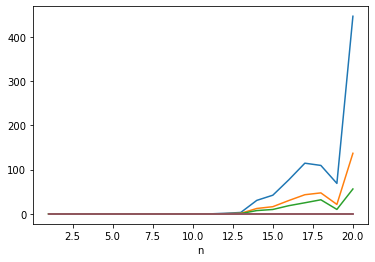

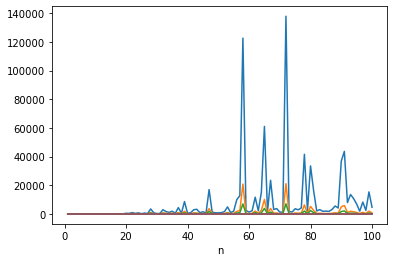

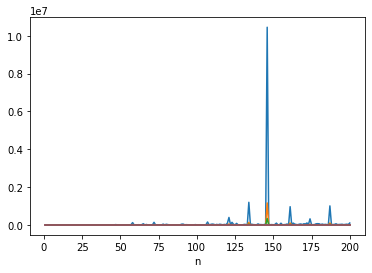

In [6]:
error_1 = np.zeros(200)
error_2 = np.zeros(200)
error_inf = np.zeros(200)
res_1 = np.zeros(200)
res_2 = np.zeros(200)
res_inf = np.zeros(200)

for i in range(error_1.size):
    (error_1[i], error_2[i], error_inf[i], res_1[i], res_2[i], res_inf[i]) = test_H_1(i + 1)
        
plt.figure()
plt.plot(np.arange(1, 21), error_1[0: 20], label = r'$|| x - x^*||_1$')
plt.plot(np.arange(1, 21), error_2[0: 20], label = r'$|| x - x^*||_2$')
plt.plot(np.arange(1, 21), error_inf[0: 20], label = r'$|| x - x^*||_\infty$')
plt.plot(np.arange(1, 21), res_1[0: 20], label = r'$|| Hx - b||_1$')
plt.plot(np.arange(1, 21), res_2[0: 20], label = r'$|| Hx - b||_2$')
plt.plot(np.arange(1, 21), res_inf[0: 20], label = r'$|| Hx - b ||_\infty$')
plt.xlabel("n")

plt.figure()
plt.plot(np.arange(1, 101), error_1[0: 100], label = r'$|| x - x^*||_1$')
plt.plot(np.arange(1, 101), error_2[0: 100], label = r'$|| x - x^*||_2$')
plt.plot(np.arange(1, 101), error_inf[0: 100], label = r'$|| x - x^*||_\infty$')
plt.plot(np.arange(1, 101), res_1[0: 100], label = r'$|| Hx - b||_1$')
plt.plot(np.arange(1, 101), res_2[0: 100], label = r'$|| Hx - b||_2$')
plt.plot(np.arange(1, 101), res_inf[0: 100], label = r'$|| Hx - b ||_\infty$')
plt.xlabel("n")

plt.figure()
plt.plot(np.arange(1, 201), error_1[0: 200], label = r'$|| x - x^*||_1$')
plt.plot(np.arange(1, 201), error_2[0: 200], label = r'$|| x - x^*||_2$')
plt.plot(np.arange(1, 201), error_inf[0: 200], label = r'$|| x - x^*||_\infty$')
plt.plot(np.arange(1, 201), res_1[0: 200], label = r'$|| Hx - b||_1$')
plt.plot(np.arange(1, 201), res_2[0: 200], label = r'$|| Hx - b||_2$')
plt.plot(np.arange(1, 201), res_inf[0: 200], label = r'$|| Hx - b ||_\infty$')
plt.xlabel("n")

